In [165]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [166]:
happyscore=pd.read_csv('happiness_score_dataset.csv')
happyscore

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [167]:
happyscore.shape

(158, 12)

In [168]:
happyscore.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [169]:
happyscore.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Here, it is observed that there is less gap between the 75th percentile and the max values in the data, hence,indicating less chances of outliers.Also,Country,Happiness Rank and Region do not contribute anything to the data.So, need to drop it.

In [170]:
happyscore_new=happyscore.drop(['Country','Region','Happiness Rank'],axis=1)
happyscore_new.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [171]:
happyscore_new.shape

(158, 9)

So, after removal 158 rows and 9 columns.

In [172]:
happyscore_new.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values present in the dataset

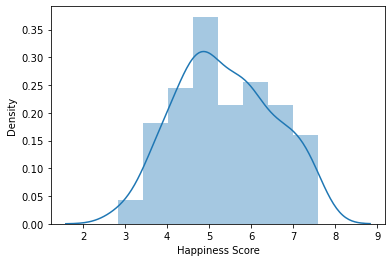

In [173]:
sns.distplot(happyscore_new['Happiness Score'])
plt.xlabel('Happiness Score')
plt.show()

It is observed that the target variable has a continuous type of data so need to proceed with the Linear Regression method

In [174]:
corr=happyscore_new.corr()

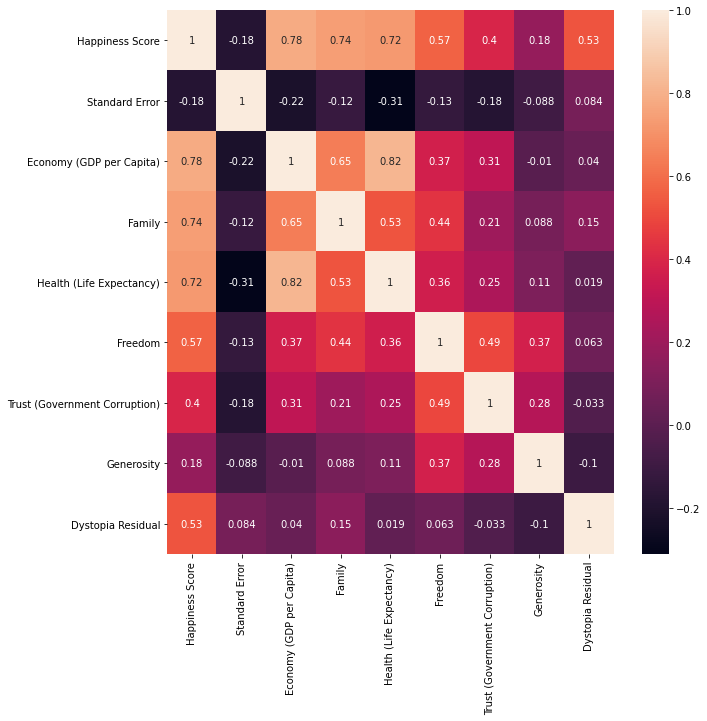

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

From the above correlation, it is observed that the attributes like Economy,Family and Health have a higher corrrelation with the happiness score.

In [176]:
happyscore_new.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

It is observed that the little skewness is present

<AxesSubplot:>

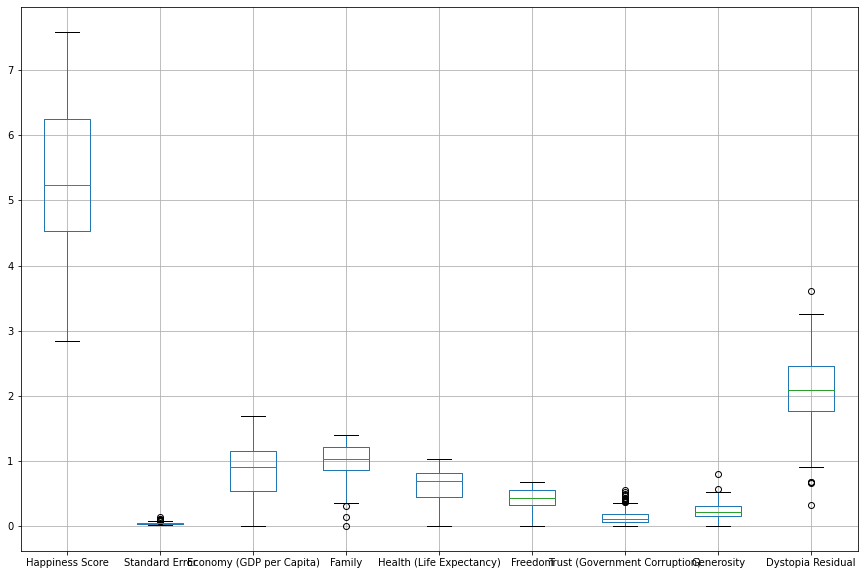

In [177]:
happyscore_new.boxplot(figsize=(15,10))

It is observed that the outliers are present in the attributes like Standard Error,Family,Trust,Generosity and Dystopia Residual

Need to remove the outliers,so need to check the Z score values 

In [178]:
data=happyscore_new.copy()

In [179]:
z=np.abs(zscore(data))
theshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [180]:
data_new=data[(z<3).all(axis=1)]#removing the outliers

In [181]:
data_new.shape

(149, 9)

Train-Test Split

In [182]:
#spliting the independent and the target variables
x=data_new.drop('Happiness Score',axis=1)
y=data_new['Happiness Score']

In [183]:
x.shape

(149, 8)

In [184]:
y.shape

(149,)

In [185]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [186]:
x_train.shape

(99, 8)

In [187]:
x_test.shape

(50, 8)

In [188]:
y_train.shape

(99,)

In [189]:
y_test.shape

(50,)

In [190]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [191]:
lm.coef_

array([-6.55538809e-04,  1.00015847e+00,  9.99896501e-01,  9.99744398e-01,
        9.99643387e-01,  1.00008062e+00,  9.99926749e-01,  9.99966413e-01])

In [192]:
lm.intercept_

0.00037515716079283834

In [193]:
lm.score(x_train,y_train)

0.99999993543426

0.99 percent the interpretation is working well

In [194]:
pred=lm.predict(x_test)
print("Happiness Score:",pred)
print("Happiness Score",y_test)

Happiness Score: [5.28629113 6.93729892 4.5122926  5.19231664 5.21200258 6.47668671
 5.60464585 3.78084155 5.47384964 5.12417951 4.64236981 7.19974374
 6.29811749 7.28393457 6.90134101 5.81252756 3.90381076 5.42859902
 5.82407879 4.03312656 6.5050129  4.33221052 6.66959544 4.25203796
 4.21854617 3.65518152 4.63348567 4.78791965 5.9751945  6.48507063
 6.81013847 6.98249722 5.5885958  7.22557655 5.99506102 4.69399405
 5.85520387 6.5750196  7.42681862 6.45456932 4.41928933 5.09760405
 5.07327856 6.94620312 7.27758774 5.12886569 3.9948474  3.66729886
 5.25281766 4.67739069]
Happiness Score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
22     6.810
15  

In [195]:
print('Error:')
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean Absolute Error:  0.00024219676833762806
Mean Squared Error:  7.985773490492606e-08
Root Mean Squared Error:  0.00028259110903375225


In [196]:
#CALCULATING THE Coefficient of Determination
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999999348437112


In [197]:
#Providing input to predict the happiness score
n=np.array([0.021,1.361,1.322,0.805,0.297,0.957,0.481,2.517])

In [198]:
n.shape

(8,)

In [200]:
n=n.reshape(1,-1)
n.shape

(1, 8)

In [201]:
lm.predict(n)

array([7.74008596])

In [205]:
Predicteddata=pd.DataFrame(pred)
Predicteddata.to_csv('model.csv')